# PyMC Dimensionality
thers a bunch of ways to work with shapes. Here's the glossary of terms

Let's dive into examples

Reccomendations
## Recommendations
1. For any real work stick with dims because it'll label the InferenceData. Best practice transparency, For a three dimensional thing what these dimensions correspond to. Not going to know this unless dims

In [1]:
import pymc as pm
import numpy as np

## Example Scalar Distributions

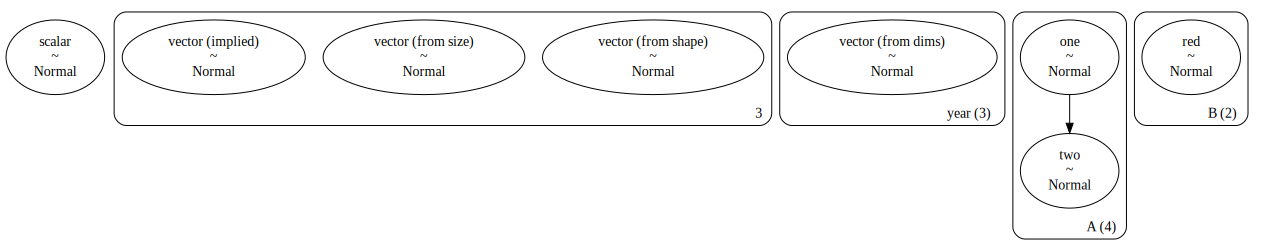

In [3]:
with pm.Model(coords={
    "year": [2020, 2021, 2022],
}) as pmodel:
    # Univariate RVs (ndim_support == 0)
    pm.Normal("scalar") # shape=()
    pm.Normal("vector (implied)", mu=[1,2,3])
    pm.Normal("vector (from shape)", shape=(3,))
    pm.Normal("vector (from size)", size=(3,))
    pm.Normal("vector (from dims)", dims=("year",))

    # Creating dims from Random Variables
    assert "A" not in pmodel.dim_lengths
    pm.Normal("one", [1,2,3,4], dims="A")  # (4,)
    assert "A" in pmodel.dim_lengths
    pm.Normal("two", dims="A")

    pm.Normal("red", size=2, dims="B")
    assert "B" in pmodel.dim_lengths

pm.model_to_graphviz(pmodel)

In [4]:
pm.MvNormal.rv_op.ndim_supp

1

In [5]:
pmodel.dim_lengths

{'year': <TensorType(int64, scalar)>,
 'A': Subtensor{int64}.0,
 'B': Subtensor{int64}.0}

## Vector Distributions

[2]
[3 2]
[3 2]


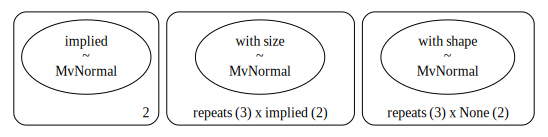

In [6]:
with pm.Model() as pmodel:
    # Multivariate RVs (ndim_supp > 0)
    mv = pm.MvNormal("implied", mu=[0, 0], cov=np.eye(2))
    assert mv.ndim == 1
    print(mv.shape.eval())

    mv = pm.MvNormal("with size", mu=[0, 0], cov=np.eye(2), size=3, dims=("repeats", "implied"))
    print(mv.shape.eval())
    # ⚠ Size dims are always __prepended__

    mv = pm.MvNormal("with shape", mu=[0, 0], cov=np.eye(2), shape=(3, ...), dims=("repeats", ...))
    print(mv.shape.eval())


pm.model_to_graphviz(pmodel)

In [7]:
pmodel["with shape"].eval()

array([[ 0.65466774,  0.22397546],
       [-0.27033677, -1.38344819],
       [ 0.75297778, -0.64158639]])

In [8]:
with pm.Model() as pmodel:
    seconds = pm.ConstantData("seconds", [1,2,3], dims="time")
    observations = pm.MutableData("obs", [2,3,1,2], dims="time")
    a = pm.Normal("a")
    b = pm.Normal("b")
    y = pm.Deterministic(
        "y",
        a * seconds + b,
        dims="time"
    )
pmodel.RV_dims

{'seconds': ('time',), 'obs': ('time',), 'y': ('time',)}

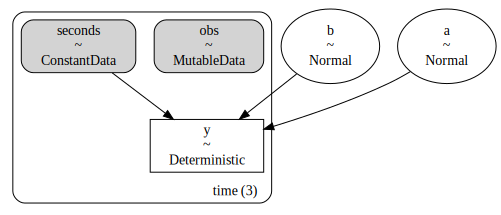

In [9]:
pm.model_to_graphviz(pmodel)

In [10]:
with pmodel:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [11]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> constant_data